# Your first embedding

## Imports

In [1]:
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise objectives:

- Run your first RNN for NLP
- Get a first taste of what an embedding is

# The data

In [2]:
def load_data(percentage_of_sentences=None):
    train_data, test_data = tfds.load(name="s", split=["train", "test"], batch_size=-1, as_supervised=True)

    train_sentences, y_train = tfds.as_numpy(train_data)
    test_sentences, y_test = tfds.as_numpy(test_data)
    
    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)
        
        len_train = int(percentage_of_sentences/100*len(train_sentences))
        train_sentences, y_train = train_sentences[:len_train], y_train[:len_train]
        len_test = int(percentage_of_sentences/100*len(test_sentences))
        test_sentences, y_test = test_sentences[:len_test], y_test[:len_test]
    
    X_train = [text_to_word_sequence(_.decode("utf-8")) for _ in train_sentences]
    X_test = [text_to_word_sequence(_.decode("utf-8")) for _ in test_sentences]
    
    return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=10)

In [4]:
print(y_train[0], X_train[0])
print(y_test[10], X_test[10])

0 ['this', 'was', 'an', 'absolutely', 'terrible', 'movie', "don't", 'be', 'lured', 'in', 'by', 'christopher', 'walken', 'or', 'michael', 'ironside', 'both', 'are', 'great', 'actors', 'but', 'this', 'must', 'simply', 'be', 'their', 'worst', 'role', 'in', 'history', 'even', 'their', 'great', 'acting', 'could', 'not', 'redeem', 'this', "movie's", 'ridiculous', 'storyline', 'this', 'movie', 'is', 'an', 'early', 'nineties', 'us', 'propaganda', 'piece', 'the', 'most', 'pathetic', 'scenes', 'were', 'those', 'when', 'the', 'columbian', 'rebels', 'were', 'making', 'their', 'cases', 'for', 'revolutions', 'maria', 'conchita', 'alonso', 'appeared', 'phony', 'and', 'her', 'pseudo', 'love', 'affair', 'with', 'walken', 'was', 'nothing', 'but', 'a', 'pathetic', 'emotional', 'plug', 'in', 'a', 'movie', 'that', 'was', 'devoid', 'of', 'any', 'real', 'meaning', 'i', 'am', 'disappointed', 'that', 'there', 'are', 'movies', 'like', 'this', 'ruining', "actor's", 'like', 'christopher', "walken's", 'good', 'nam

In [5]:
# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set!
# This tokenization also lowercases your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)
    
# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

Print some of the tokenized sentences to be sure you got what you expected

In [6]:
sentence_number = 100

input_raw = X_train[sentence_number]
input_token = X_train_token[sentence_number]

for i in range(40):
    print(f'Word : {input_raw[i]} -> Token {input_token[i]}')

Word : i -> Token 9
Word : enjoyed -> Token 579
Word : this -> Token 11
Word : movie -> Token 18
Word : and -> Token 3
Word : after -> Token 104
Word : watching -> Token 155
Word : it -> Token 10
Word : it -> Token 10
Word : made -> Token 90
Word : me -> Token 65
Word : wonder -> Token 574
Word : just -> Token 40
Word : how -> Token 84
Word : many -> Token 107
Word : 'caitlin -> Token 17238
Word : rose's' -> Token 17239
Word : exist -> Token 1632
Word : in -> Token 8
Word : the -> Token 1
Word : world -> Token 189
Word : how -> Token 84
Word : many -> Token 107
Word : other -> Token 82
Word : girls -> Token 526
Word : have -> Token 25
Word : been -> Token 76
Word : subjected -> Token 5574
Word : to -> Token 5
Word : this -> Token 11
Word : sort -> Token 406
Word : of -> Token 4
Word : sexual -> Token 991
Word : abuse -> Token 2393
Word : and -> Token 3
Word : torment -> Token 8200
Word : by -> Token 31
Word : classmates -> Token 7069
Word : and -> Token 3
Word : have -> Token 25


Add a vocab_size variable that stores the number of different words (=tokens) in the train set. This is called the size of the vocabulary

In [7]:
vocab_size = len(tokenizer.word_index)

print(f'There are {vocab_size} different words in the train set')

There are 30419 different words in the train set


Pad your data with the pad_sequences function

In [8]:
X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')

# The RNN

In [9]:
embedding_dimension = 50

In [10]:
def initialize_rnn_model(vocab_size, embedding_dimension):
    model = Sequential()
    
    model.add(layers.Embedding(
        input_dim=vocab_size + 1,
        output_dim=embedding_dimension,
        mask_zero=True)
             )
    
    model.add(layers.LSTM(20))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer='rmsprop',
        metrics=['accuracy']
    )
    
    return model

In [11]:
rnn_model = initialize_rnn_model(vocab_size, embedding_dimension)

In [12]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          1521000   
                                                                 
 lstm (LSTM)                 (None, 20)                5680      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1526901 (5.82 MB)
Trainable params: 1526901 (5.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Double-check that the number of parameters in your embedding layer is equal to the (number of words in your vocabulary + 1 for the masking value) × the dimension of your embedding.

In [13]:
print(f'Expected number of parameters : {(vocab_size + 1) * embedding_dimension}')

Expected number of parameters : 1521000


 Start fitting your model with 20 epochs, with an early stopping criterion whose patience is equal to 4

In [14]:
es = EarlyStopping(patience=4, restore_best_weights=True)

rnn_model.fit(
    X_train_pad,
    y_train, 
    epochs=20, 
    batch_size=16,
    validation_split=0.3,
    callbacks=[es]
)

Epoch 1/20



110/110 [==============================] - 73s 557ms/step - loss: 0.6890 - accuracy: 0.5571 - val_loss: 0.6751 - val_accuracy: 0.5840
Epoch 2/20
110/110 [==============================] - 58s 529ms/step - loss: 0.5895 - accuracy: 0.7194 - val_loss: 0.5376 - val_accuracy: 0.7240
Epoch 3/20
110/110 [==============================] - 58s 525ms/step - loss: 0.3600 - accuracy: 0.8623 - val_loss: 0.8424 - val_accuracy: 0.5600
Epoch 4/20
110/110 [==============================] - 57s 522ms/step - loss: 0.2165 - accuracy: 0.9200 - val_loss: 0.4280 - val_accuracy: 0.8080
Epoch 5/20
110/110 [==============================] - 58s 524ms/step - loss: 0.0967 - accuracy: 0.9726 - val_loss: 0.5422 - val_accuracy: 0.8347
Epoch 6/20
110/110 [==============================] - 58s 525ms/step - loss: 0.0714 - accuracy: 0.9829 - val_loss: 0.5438 - val_accuracy: 0.8253
Epoch 7/20
110/110 [==============================] - 58s 525ms/step - loss: 0.0182 - accuracy: 0.9960 - val_loss: 2.1444 - val_accuracy: 0.6

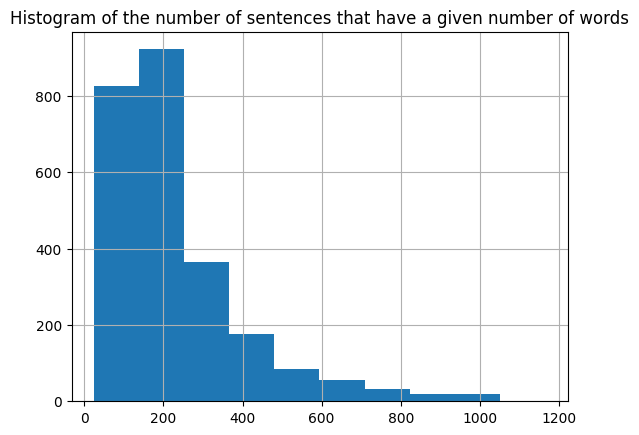

In [15]:
def plot_hist(X):
    len_ = [len(_) for _ in X]
    plt.hist(len_)
    plt.title('Histogram of the number of sentences that have a given number of words')
    plt.grid(True)
    plt.show()
    
plot_hist(X_train)

But what if you pad the data to a maximum length (maxlen) of say 200 (words)?

In [16]:
X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post', maxlen=200)

In [17]:
rnn_model.fit(
    X_train_pad,
    y_train, 
    epochs=20, 
    batch_size=16,
    validation_split=0.3,
    callbacks=[es]
)

Epoch 1/20
110/110 [==============================] - 21s 134ms/step - loss: 0.1134 - accuracy: 0.9674 - val_loss: 0.6296 - val_accuracy: 0.7707
Epoch 2/20
110/110 [==============================] - 11s 100ms/step - loss: 0.0496 - accuracy: 0.9869 - val_loss: 0.5670 - val_accuracy: 0.8093
Epoch 3/20
110/110 [==============================] - 11s 99ms/step - loss: 0.0262 - accuracy: 0.9931 - val_loss: 1.0197 - val_accuracy: 0.7787
Epoch 4/20
110/110 [==============================] - 11s 99ms/step - loss: 0.0230 - accuracy: 0.9960 - val_loss: 0.7710 - val_accuracy: 0.8053
Epoch 5/20
110/110 [==============================] - 11s 99ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.8052 - val_accuracy: 0.7947
Epoch 6/20
110/110 [==============================] - 11s 99ms/step - loss: 7.5740e-04 - accuracy: 1.0000 - val_loss: 1.1541 - val_accuracy: 0.7920
